Diamond Price Prediction
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd
import os

In [2]:

## Data Ingestions step
df = pd.read_csv(os.getcwd()+"/data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [4]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [5]:
df.describe(include="all")

,id,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573,193573,193573,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,92454,44391,53272,NaN,NaN,NaN,NaN,NaN,NaN
mean,96786.000000,0.790688,NaN,NaN,NaN,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,NaN,NaN,NaN,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,NaN,NaN,NaN,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,NaN,NaN,NaN,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,NaN,NaN,NaN,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,NaN,NaN,NaN,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000


In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
### No missing values present in data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
#here id column not needed for prediction.so let's drop it
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
## Check for duplicated records
df.duplicated().sum()

0

In [11]:
## separate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print(f"numerical columns :{numerical_columns}\ncategorical_columns : {categorical_columns}")

numerical columns :Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [12]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [14]:
df['cut'].nunique()

5

In [15]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [16]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [17]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='count'>

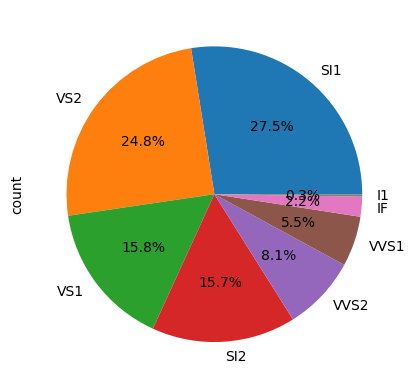

In [19]:
df['clarity'].value_counts().plot.pie(y=df['clarity'], autopct="%1.1f%%")

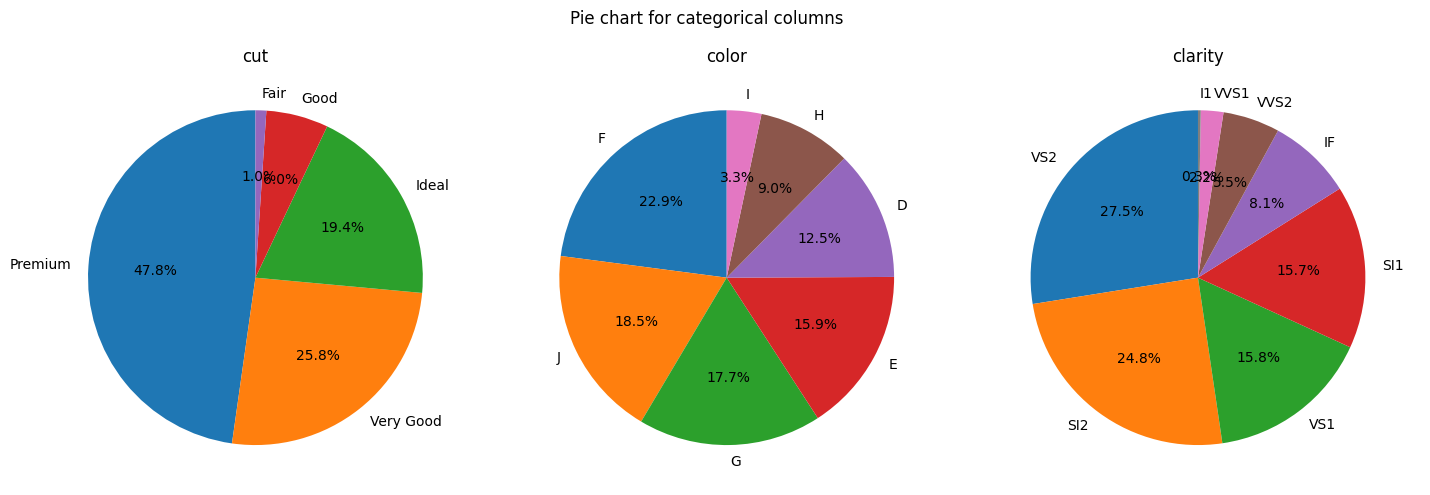

In [20]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,3,figsize=(15,5))
# Loop through the categorical columns and create pie charts
for i in range(len(categorical_columns)):
    axis[i].pie(df[categorical_columns[i]].value_counts(),labels=df[categorical_columns[i]].unique(),autopct="%1.1f%%",startangle=90)
    axis[i].set_title(categorical_columns[i])
    axis[i].axis("equal")
# Add a common title for the entire plot
plt.suptitle("Pie chart for categorical columns")
plt.tight_layout()
plt.show()


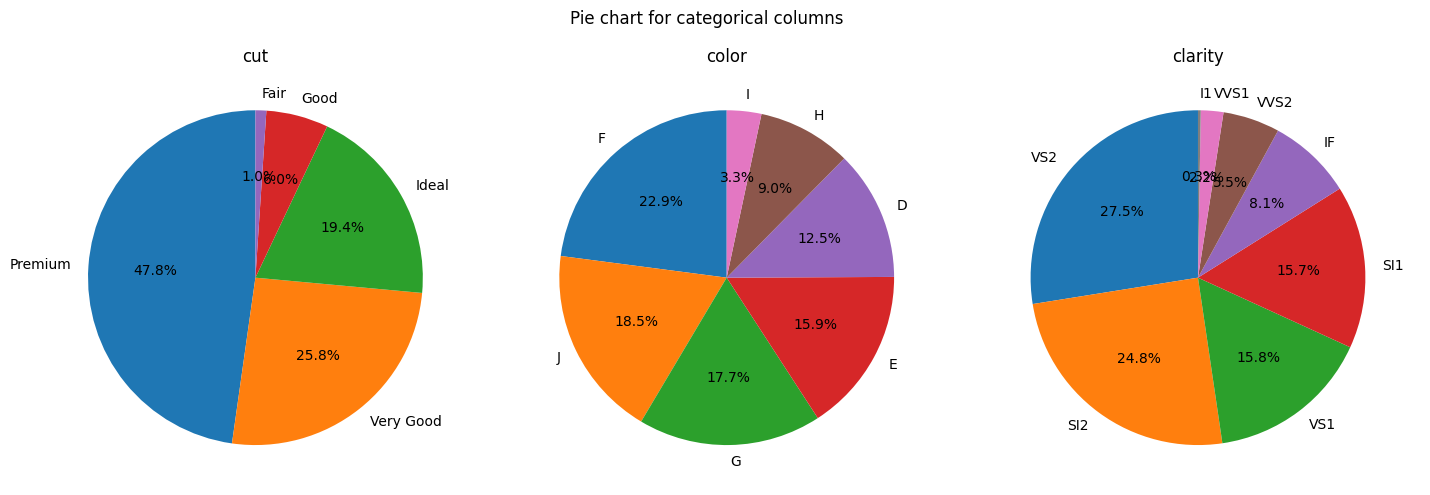

In [21]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,3,figsize=(15,5))
# Loop through the categorical columns and create pie charts
for i in range(len(categorical_columns)):
    axis[i].pie(df[categorical_columns[i]].value_counts(),labels=df[categorical_columns[i]].unique(),autopct="%1.1f%%",startangle=90)
    axis[i].set_title(categorical_columns[i])
    axis[i].axis("equal")
# Add a common title for the entire plot
plt.suptitle("Pie chart for categorical columns")
plt.tight_layout()
plt.show()


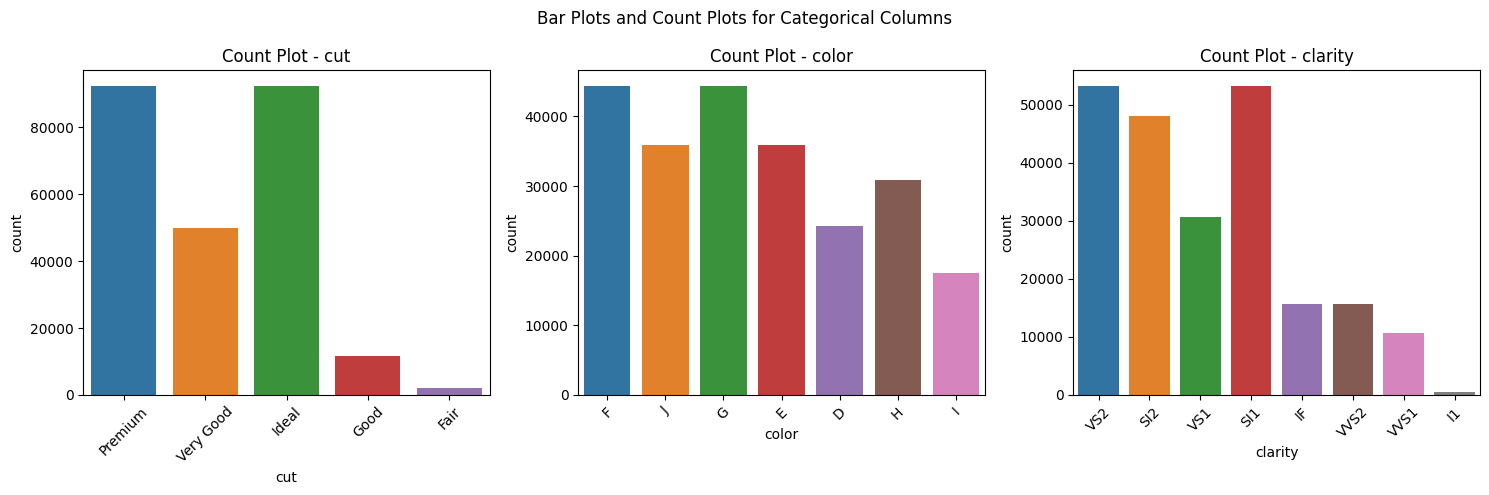

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming categorical_columns is a list containing the column names
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the categorical columns and create bar plots and count plots
for i in range(len(categorical_columns)):
    # Bar Plot
    sns.barplot(x=df[categorical_columns[i]].value_counts().index, y=df[categorical_columns[i]].value_counts(), ax=axes[i])
    axes[i].set_title(f"Bar Plot - {categorical_columns[i]}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotating x-axis labels for better readability
    
    # Count Plot
    sns.countplot(x=categorical_columns[i], data=df, ax=axes[i])
    axes[i].set_title(f"Count Plot - {categorical_columns[i]}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotating x-axis labels for better readability

# Add a common title for the entire plot
plt.suptitle("Bar Plots and Count Plots for Categorical Columns")
plt.tight_layout()
plt.show()


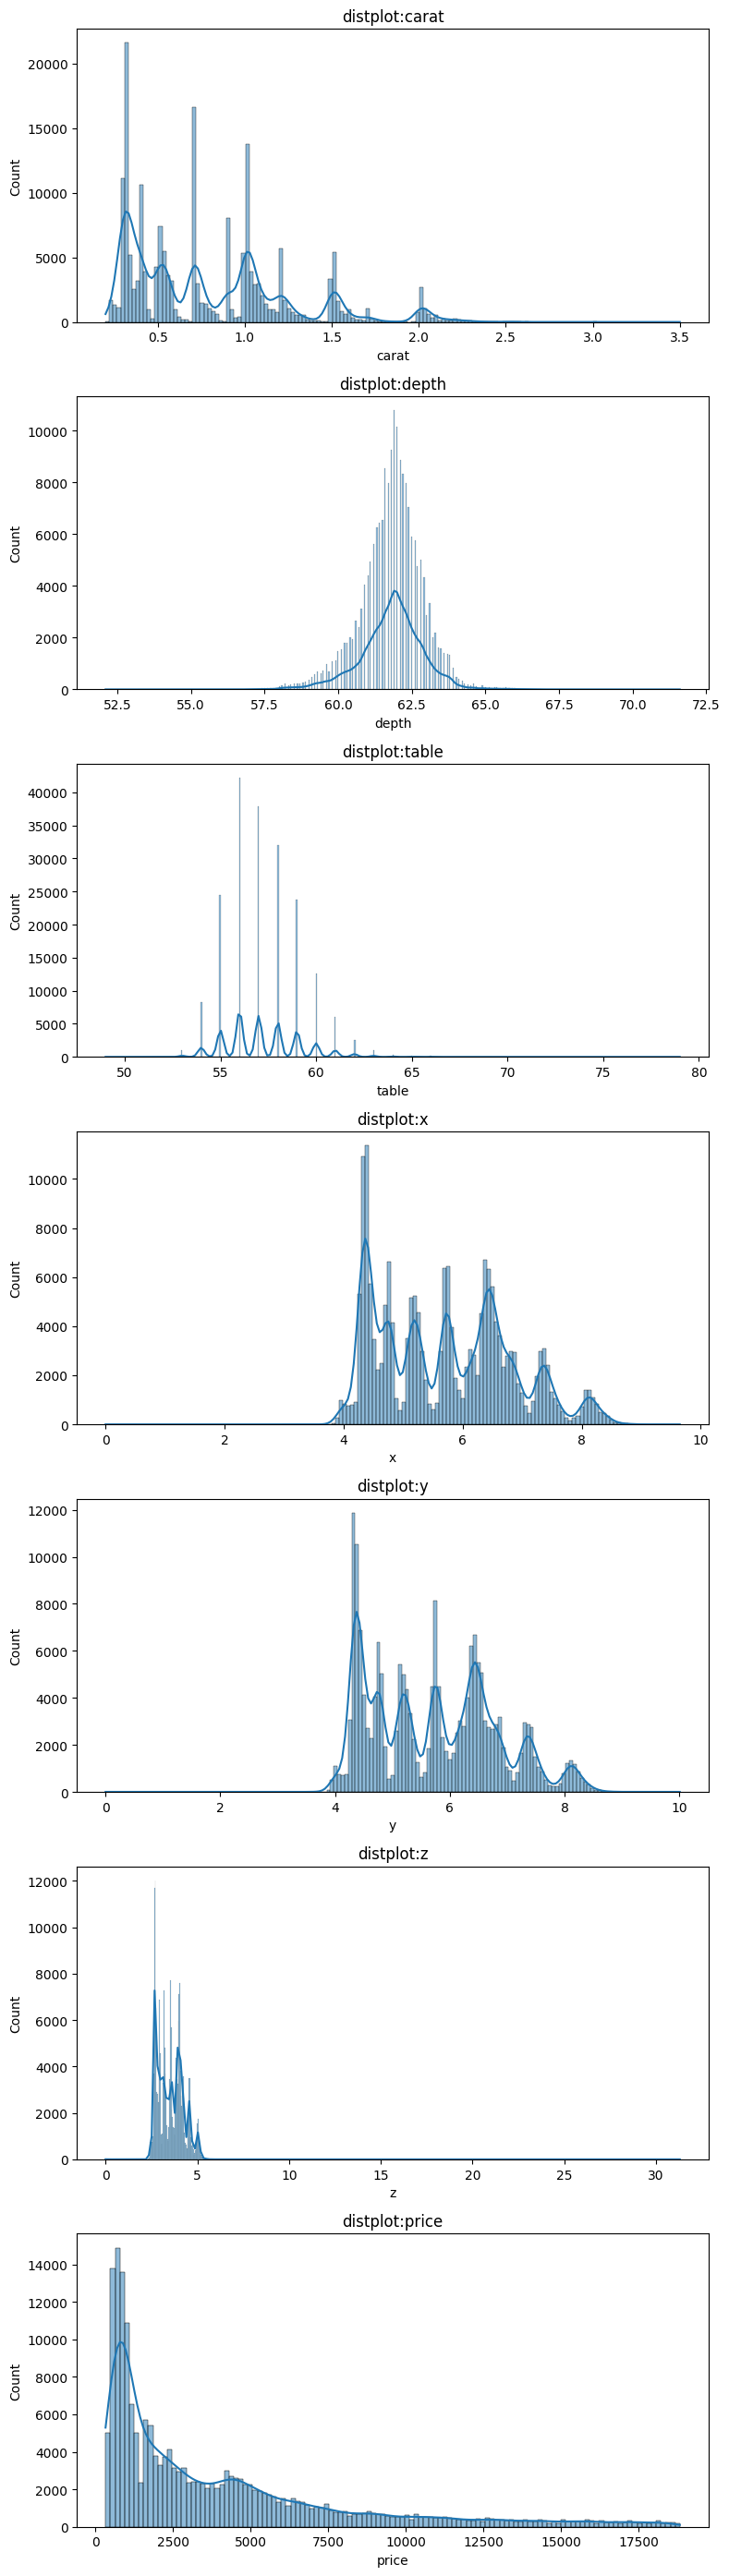

In [23]:
#for numerical columns 
# fig,axes = plt.subplots(1,len(numerical_columns),figsize=(15,3))
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, 4*len(numerical_columns)))

for i in range(len(numerical_columns)):
    sns.histplot(df[numerical_columns[i]],ax=axes[i],kde=True)
    axes[i].set_title(f"distplot:{numerical_columns[i]}")

# plt.suptitle("histplot for numerical columns")
plt.tight_layout()
plt.show()


        carat  depth  table     x     y     z  price
0        1.52   62.2   58.0  7.27  7.33  4.55  13619
1        2.03   62.0   58.0  8.06  8.12  5.05  13387
2        0.70   61.2   57.0  5.69  5.73  3.50   2772
3        0.32   61.6   56.0  4.38  4.41  2.71    666
4        1.70   62.6   59.0  7.65  7.61  4.77  14453
...       ...    ...    ...   ...   ...   ...    ...
193568   0.31   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34   62.9   55.0  4.45  4.49  2.81    681
193572   0.71   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 7 columns]


<Axes: >

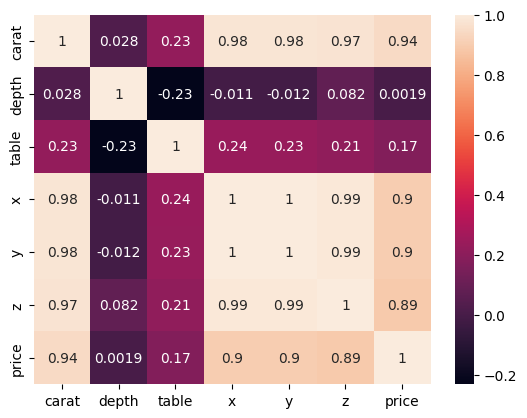

In [28]:
#correlation
numeric_col = df.select_dtypes(include='number')
sns.heatmap(numeric_col.corr(),annot=True)

<Axes: >

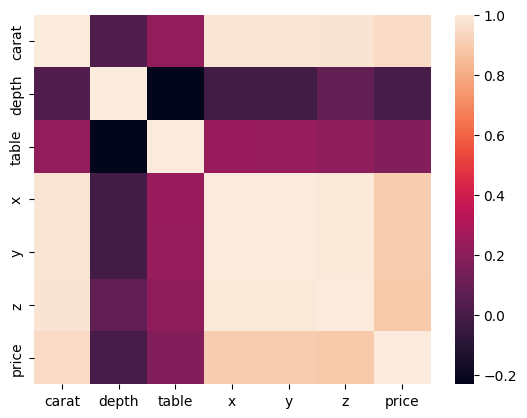